In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Feature Combine

In [ ]:
import pandas as pd

store_list = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/final_store_list.csv').iloc[:, 1:]

## Decrease

In [ ]:
yuseon_toddler = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/toddler_grade.csv').iloc[:, 1:]
yuseon_foreign = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/short_term_grade.csv').iloc[:, 1:]

In [ ]:
decrease_df = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/decrease.csv').iloc[:, 1:]  # 86
decrease_df = pd.merge(decrease_df, store_list, on = '점포코드')

# yuseon
yuseon_decrease = pd.merge(decrease_df[['점포코드', '시군구']], yuseon_foreign, on = '시군구')
yuseon_d_toddler = pd.merge(decrease_df[['점포코드', '시군구']], yuseon_toddler, on = '시군구')

# jusung
jusung_temp = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/등급화 한 피처/dec_ju_grade_cf.csv').iloc[:, 1:]


# sori
sori_temp = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/소리_5등급화함(1).csv')
sori_temp.columns = ['점포코드', '시군구', '1인가구수', '단지', '종합', '아파트']
sori_feature = pd.merge(decrease_df, sori_temp, on = ['점포코드', '시군구'])

# minji
minji_decrease = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/등급화 한 피처/dec_min_grade_cf.csv').iloc[:, 1:]


# jihun
jihun_decrease = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/jihun_clustering_decrease.csv')

In [ ]:
# combine
a = pd.merge(yuseon_decrease, yuseon_d_toddler, on = ['점포코드', '시군구'])
a

,점포코드,시군구,short_foreign_grade,toddler_grade
0,A1,서대문구,2,4
1,C331,서대문구,2,4
2,C475,서대문구,2,4
3,A12,강남구,2,2
4,C317,강남구,2,2
...,...,...,...,...
81,C330,은평구,4,2
82,C34,은평구,4,2
83,C342,도봉구,5,4
84,C406,도봉구,5,4


In [ ]:
a = pd.merge(a, minji_decrease, on = ['점포코드', '시군구'])
a

,점포코드,시군구,short_foreign_grade,toddler_grade,property_mean_grade
0,A1,서대문구,2,4,4
1,C331,서대문구,2,4,4
2,C475,서대문구,2,4,4
3,A12,강남구,2,2,1
4,C317,강남구,2,2,1
...,...,...,...,...,...
81,C330,은평구,4,2,5
82,C34,은평구,4,2,5
83,C342,도봉구,5,4,5
84,C406,도봉구,5,4,5


In [ ]:
a = pd.merge(a, jusung_temp, on = ['점포코드', '시군구'])
a

,점포코드,시군구,short_foreign_grade,toddler_grade,property_mean_grade,eldery_rate,pop_change
0,A1,서대문구,2,4,4,2,1
1,C331,서대문구,2,4,4,2,1
2,C475,서대문구,2,4,4,2,1
3,A12,강남구,2,2,1,5,2
4,C317,강남구,2,2,1,5,2
...,...,...,...,...,...,...,...
81,C330,은평구,4,2,5,2,1
82,C34,은평구,4,2,5,2,1
83,C342,도봉구,5,4,5,2,2
84,C406,도봉구,5,4,5,2,2


In [ ]:
a = pd.merge(a, sori_feature[['점포코드', '시군구', '1인가구수']], on = ['점포코드', '시군구'])
a

,점포코드,시군구,short_foreign_grade,toddler_grade,property_mean_grade,eldery_rate,pop_change,1인가구수
0,A1,서대문구,2,4,4,2,1,3
1,C331,서대문구,2,4,4,2,1,3
2,C475,서대문구,2,4,4,2,1,3
3,A12,강남구,2,2,1,5,2,2
4,C317,강남구,2,2,1,5,2,2
...,...,...,...,...,...,...,...,...
81,C330,은평구,4,2,5,2,1,3
82,C34,은평구,4,2,5,2,1,3
83,C342,도봉구,5,4,5,2,2,4
84,C406,도봉구,5,4,5,2,2,4


In [ ]:
a.query('시군구 == "노원구"')

,점포코드,시군구,short_foreign_grade,toddler_grade,property_mean_grade,eldery_rate,pop_change,1인가구수
26,A20,노원구,5,2,4,4,3,3
27,B8,노원구,5,2,4,4,3,3
28,C18,노원구,5,2,4,4,3,3
29,C500,노원구,5,2,4,4,3,3
30,C99,노원구,5,2,4,4,3,3


In [ ]:
decrease_st_clustering.query("cluster_label == 1")

In [ ]:
decrease_st_clustering.query("시군구 == '성동구'")

,점포코드,시군구,short_foreign_grade,toddler_grade,property_mean_grade,eldery_rate,pop_change,1인가구수
52,B14,성동구,4,4,3,3,1,4
53,C163,성동구,4,4,3,3,1,4
54,C499,성동구,4,4,3,3,1,4
55,D7,성동구,4,4,3,3,1,4


In [ ]:
decrease_st_clustering.to_csv('final_decrease_clustering_features.csv')

## Increase

In [ ]:
increase_df = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/increase.csv').iloc[:, 1:]

In [ ]:
# yuseon
yuseon_in = pd.merge(increase_df, yuseon_foreign, on = ['시군구'])
yuseon_in_toddler = pd.merge(increase_df, yuseon_toddler, on = '시군구')

# jusung
jusung_temp_in = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/등급화 한 피처/inc_ju_grade_cf.csv').iloc[:, 1:]


# sori
sori_temp_in = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/소리_5등급화함(1).csv')
sori_temp_in.columns = ['점포코드', '시군구', '1인가구수', '단지', '종합', '아파트']
sori_in = pd.merge(increase_df, sori_temp_in, on = ['점포코드', '시군구'])

# minji
minji_in = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/등급화 한 피처/inc_min_grade_cf.csv').iloc[:, 1:]


# jihun
jihun_in = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/jihun_clustering_increase.csv')

In [ ]:
a = pd.merge(yuseon_in, yuseon_in_toddler, on = ['점포코드', '시군구'])
a

In [ ]:
a = pd.merge(a, minji_in, on = ['점포코드', '시군구'])
a

In [ ]:
a = pd.merge(a, jusung_temp_in, on = ['점포코드', '시군구'])
a

In [ ]:
a = pd.merge(a, sori_in[['점포코드', '시군구', '1인가구수']], on = ['점포코드', '시군구'])
a

In [ ]:
a.to_csv('increase_final_clustering_features.csv')

In [ ]:
# combine
a_in = pd.merge(yuseon_in, jusung_in, on = ['점포코드', '시군구'])
increase_st_clustering = pd.merge(a_in, sori_in, on = ['점포코드', '시군구'])
increase_st_clustering

In [ ]:
increase_st_clustering = pd.merge(increase_st_clustering, yuseon_in_toddler, on = ['점포코드', '시군구'])
increase_st_clustering

In [ ]:
increase_st_clustering = pd.merge(increase_st_clustering, minji_in, on = ['점포코드', '시군구'])
increase_st_clustering

In [ ]:
increase_st_clustering = pd.merge(increase_st_clustering, jihun_in, on = ['점포코드'])
increase_st_clustering

In [ ]:
increase_st_clustering = increase_st_clustering.loc[:, ['점포코드', '시군구', 'short_term_foreign', 'property_mean_log', 'toddler_avg', 'marriage', '1인가구수', 'rate']]
increase_st_clustering

In [ ]:
increase_st_clustering.to_csv('final_increase_clustering_features.csv')

# Clustering

In [ ]:
pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/X_FEATURES/합친피처/모두합친피처/final/train_features.csv')

In [ ]:
import pandas as pd

decrease_st_clustering = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/final/찐final/decrease_clustering_final_features.csv').iloc[:, 1:]
increase_st_clustering = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES/final/찐final/increase_final_clustering_features.csv').iloc[:, 1:]

increase_st_clustering = increase_st_clustering[['점포코드', '시군구', 'toddler_grade', 'property_mean_grade', 'eldery_rate', '1인가구수']]
increase_st_clustering

decrease_st_clustering = decrease_st_clustering[['점포코드', '시군구', 'toddler_grade', 'property_mean_grade', 'eldery_rate', '1인가구수']]
decrease_st_clustering

,점포코드,시군구,toddler_grade,property_mean_grade,eldery_rate,1인가구수
0,A1,서대문구,4,4,2,3
1,C331,서대문구,4,4,2,3
2,C475,서대문구,4,4,2,3
3,A12,강남구,2,1,5,2
4,C317,강남구,2,1,5,2
...,...,...,...,...,...,...
81,C330,은평구,2,5,2,3
82,C34,은평구,2,5,2,3
83,C342,도봉구,4,5,2,4
84,C406,도봉구,4,5,2,4


In [ ]:
class_cluster = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/X_FEATURES/합친피처/모두합친피처/final/val_test_feature.csv')[['점포코드', 'AVG_PUR', 'LUXURY', 'ESSENTIAL', 'AGE_REGION_RATE', 'f_amt_grade']]
class_cluster

,점포코드,AVG_PUR,LUXURY,ESSENTIAL,AGE_REGION_RATE,f_amt_grade
0,A1,0,-1.0,0.0,9,0
1,A12,0,0.0,-1.0,10,0
2,A2,0,0.0,0.0,10,0
3,A20,0,0.0,0.0,10,0
4,A24,-1,0.0,-1.0,10,0
...,...,...,...,...,...,...
158,D4,1,1.0,1.0,9,0
159,D5,1,0.0,3.0,8,0
160,D6,0,2.0,1.0,2,0
161,D7,-1,0.0,2.0,8,0


In [ ]:
increase_st_clustering = pd.merge(increase_st_clustering, class_cluster, on = '점포코드').fillna(0)
increase_st_clustering

,점포코드,시군구,toddler_grade,property_mean_grade,eldery_rate,1인가구수,AVG_PUR,LUXURY,ESSENTIAL,AGE_REGION_RATE,f_amt_grade
0,B11,동대문구,4,4,2,2,-1,1.0,-1.0,1,0
1,C343,동대문구,4,4,2,2,0,0.0,0.0,9,-1
2,C573,동대문구,4,4,2,2,-2,0.0,0.0,2,-3
3,B3,영등포구,3,2,4,3,0,-2.0,0.0,1,-1
4,C14,영등포구,3,2,4,3,-2,-3.0,-3.0,2,-2
...,...,...,...,...,...,...,...,...,...,...,...
72,C242,동작구,3,4,3,2,0,0.0,0.0,3,-1
73,C303,양천구,2,4,5,4,0,0.0,0.0,2,0
74,C402,용산구,4,4,2,4,0,0.0,0.0,2,-1
75,C540,종로구,5,2,1,5,0,2.0,0.0,2,1


In [ ]:
decrease_st_clustering = pd.merge(decrease_st_clustering, class_cluster, on = '점포코드').fillna(0)
decrease_st_clustering

,점포코드,시군구,toddler_grade,property_mean_grade,eldery_rate,1인가구수,AVG_PUR,LUXURY,ESSENTIAL,AGE_REGION_RATE,f_amt_grade
0,A1,서대문구,4,4,2,3,0,-1.0,0.0,9,0
1,C331,서대문구,4,4,2,3,0,-1.0,-1.0,9,0
2,C475,서대문구,4,4,2,3,0,0.0,0.0,9,1
3,A12,강남구,2,1,5,2,0,0.0,-1.0,10,0
4,C317,강남구,2,1,5,2,0,-1.0,3.0,9,1
...,...,...,...,...,...,...,...,...,...,...,...
81,C330,은평구,2,5,2,3,0,2.0,1.0,2,0
82,C34,은평구,2,5,2,3,0,2.0,0.0,9,0
83,C342,도봉구,4,5,2,4,0,-1.0,-1.0,9,0
84,C406,도봉구,4,5,2,4,0,0.0,0.0,3,0


In [ ]:
# increase_st_clustering, decrease_st_clustering

In [ ]:
import numpy as np

in_cluster_f = np.array(increase_st_clustering.iloc[:, 2:])
d_cluster_f = np.array(decrease_st_clustering.iloc[:, 2:])

In [ ]:
increase_st_clustering.to_csv('increase_clustering.csv')
decrease_st_clustering.to_csv('decrease_clustering.csv')

In [ ]:
print(len(increase_st_clustering.시군구.unique()))
len(decrease_st_clustering.시군구.unique())

22


23

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/X_FEATURES/합친피처/모두합친피처/final/val_test_feature.csv')

increase = pd.merge(increase_st_clustering[['점포코드', '시군구']], features, on = ['점포코드'])
increase.fillna(0, inplace = True)
increase_array = np.array(increase.iloc[:, 2:-1])

decrease.fillna(0, inplace = True)
decrease = pd.merge(decrease_st_clustering[['점포코드', '시군구']], features, on = ['점포코드'])
decrease_array = np.array(decrease.iloc[:, 2:-1])

## Clustering Functions

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers= ['o','s','^','1','2','3','4','<','>','D','d','h','H']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

# Clustering

In [ ]:
temp_decrease.groupby('cluster_labels')['점포코드'].count()

In [ ]:
temp_increase.groupby('cluster_labels')['점포코드'].count()

In [ ]:
temp_decrease.to_csv('decrease_cluster.csv')

In [ ]:
temp_increase.to_csv('increase_cluster.csv')

# Increase

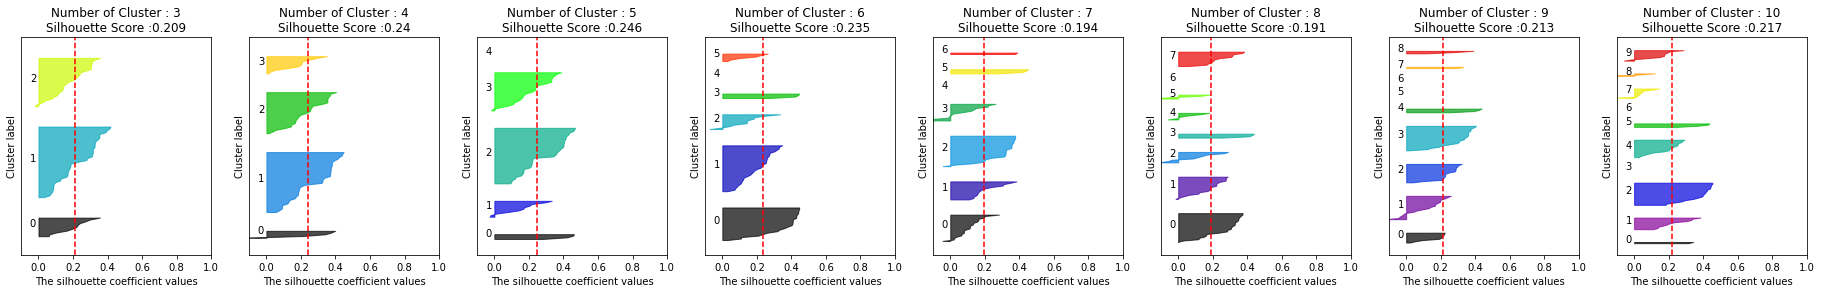

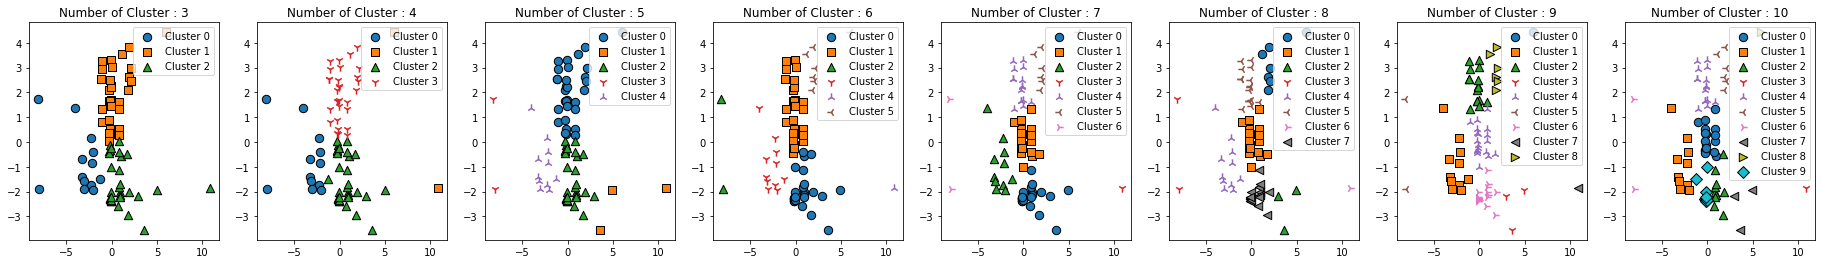

In [ ]:
import matplotlib.pyplot as plt

visualize_silhouette([3, 4, 5, 6, 7, 8, 9, 10], in_cluster_f)
visualize_kmeans_plot_multi([3, 4, 5, 6, 7, 8, 9, 10], in_cluster_f)

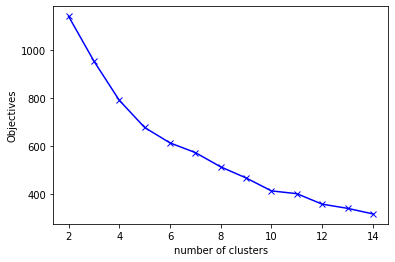

In [ ]:
from sklearn.cluster import KMeans

Objectives = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(in_cluster_f)
    Objectives.append(km.inertia_)

plt.plot(K, Objectives, 'bx-')
plt.xlabel('k')
plt.ylabel('Objectives')
plt.xlabel('number of clusters')
plt.show() 

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_kmean_4 = in_cluster_f.copy()

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(df_kmean_4)
kmeans.labels_

array([2, 0, 2, 3, 3, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3,
       3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 2, 3, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 2, 2,
       2, 3, 0, 1, 2, 2, 2, 1, 2, 2, 3], dtype=int32)

In [ ]:
increase_st_clustering['cluster_labels'] = kmeans.labels_
increase_st_clustering

,점포코드,시군구,toddler_grade,property_mean_grade,eldery_rate,1인가구수,AVG_PUR,LUXURY,ESSENTIAL,AGE_REGION_RATE,f_amt_grade,cluster_labels
0,B11,동대문구,4,4,2,2,-1,1.0,-1.0,1,0,2
1,C343,동대문구,4,4,2,2,0,0.0,0.0,9,-1,0
2,C573,동대문구,4,4,2,2,-2,0.0,0.0,2,-3,2
3,B3,영등포구,3,2,4,3,0,-2.0,0.0,1,-1,3
4,C14,영등포구,3,2,4,3,-2,-3.0,-3.0,2,-2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
72,C242,동작구,3,4,3,2,0,0.0,0.0,3,-1,2
73,C303,양천구,2,4,5,4,0,0.0,0.0,2,0,1
74,C402,용산구,4,4,2,4,0,0.0,0.0,2,-1,2
75,C540,종로구,5,2,1,5,0,2.0,0.0,2,1,2


In [ ]:
increase_st_clustering.groupby(['cluster_labels'])[['점포코드']].count()

,점포코드
cluster_labels,
0,5
1,36
2,25
3,11


In [ ]:
increase_st_clustering.query("cluster_labels == 0")

,점포코드,시군구,toddler_grade,property_mean_grade,eldery_rate,1인가구수,AVG_PUR,LUXURY,ESSENTIAL,AGE_REGION_RATE,f_amt_grade,cluster_labels
1,C343,동대문구,4,4,2,2,0,0.0,0.0,9,-1,0
5,C482,영등포구,3,2,4,3,-5,0.0,0.0,4,-2,0
43,C74,서초구,2,2,5,3,0,1.0,3.0,8,0,0
47,C412,마포구,3,3,4,2,-2,0.0,0.0,8,-2,0
68,C193,관악구,3,4,4,1,-1,-2.0,0.0,9,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

## getting X, y values
X = in_cluster_f
y = np.array(increase_st_clustering.loc[:, ['cluster_labels']])

## initiating DecisionTreeClassifer method
dt_clf = DecisionTreeClassifier(random_state = 1004)


## fitting a decision tree classifier
dt_clf_model = dt_clf.fit(X, y)

## feature importances
dt_clf_model.feature_importances_

array([0.07555398, 0.03588814, 0.36534293, 0.        , 0.        ,
       0.31588742, 0.06799858, 0.13932894, 0.        ])

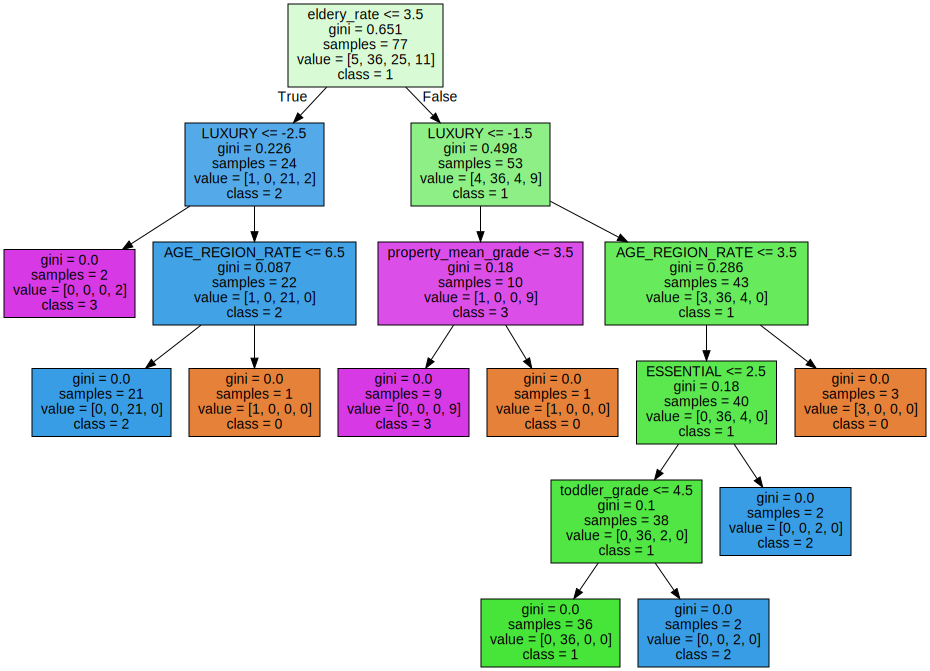

In [ ]:
## Visualizing Tree using Graphviz
from sklearn import tree
import graphviz

## exporting tree in DOT format
## refer to: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
tree_dot = tree.export_graphviz(
    dt_clf_model, 
    feature_names=increase_st_clustering.iloc[:, 2:-1].columns, 
    class_names=['0', '1', '2', '3'],
    filled=True,
)


## draw graph using Graphviz
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph

# Decrease

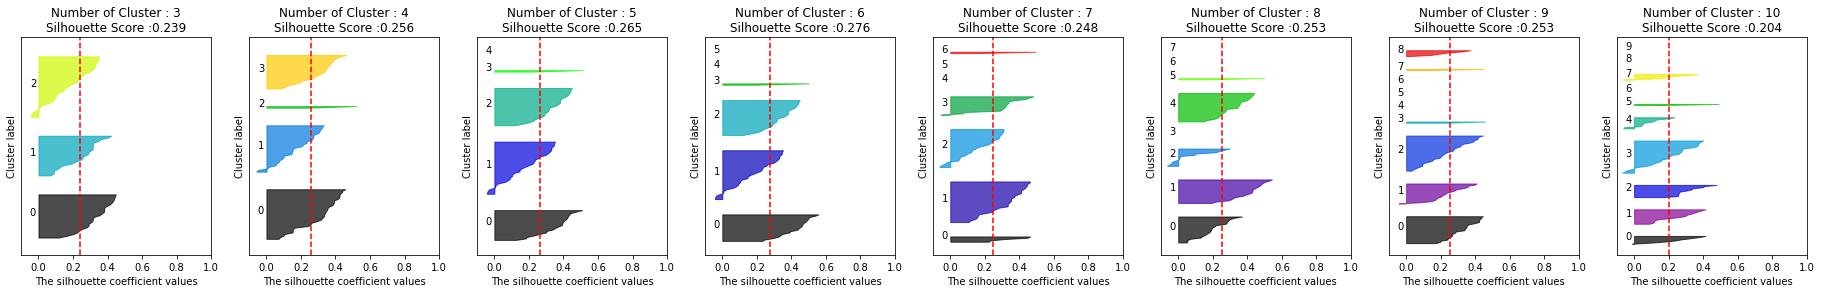

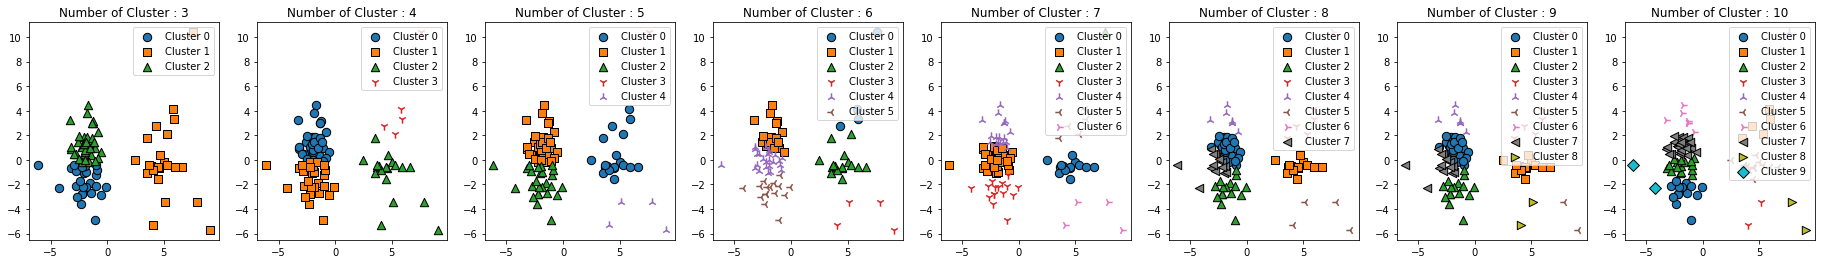

In [ ]:
import matplotlib.pyplot as plt

visualize_silhouette([3, 4, 5, 6, 7, 8, 9, 10], d_cluster_f)
visualize_kmeans_plot_multi([3, 4, 5, 6, 7, 8, 9, 10], d_cluster_f)

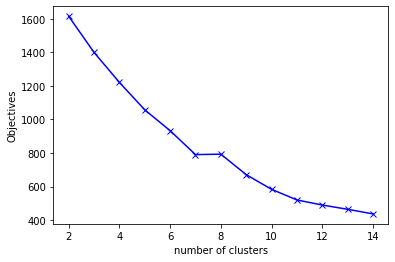

In [ ]:
from sklearn.cluster import KMeans

Objectives = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(d_cluster_f)
    Objectives.append(km.inertia_)

plt.plot(K, Objectives, 'bx-')
plt.xlabel('k')
plt.ylabel('Objectives')
plt.xlabel('number of clusters')
plt.show() 

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_kmean_4 = d_cluster_f.copy()

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(df_kmean_4)
kmeans.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 3, 0, 3, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 3, 1, 3, 0, 0, 0, 0,
       1, 1, 0, 3, 3, 1, 1, 0, 1, 3, 1, 3, 3, 3, 0, 3, 0, 0, 3, 3],
      dtype=int32)

In [ ]:
decrease_st_clustering['cluster_label'] = kmeans.labels_
decrease_st_clustering

,점포코드,시군구,toddler_grade,property_mean_grade,eldery_rate,1인가구수,AVG_PUR,LUXURY,ESSENTIAL,AGE_REGION_RATE,f_amt_grade,cluster_label
0,A1,서대문구,4,4,2,3,0,-1.0,0.0,9,0,0
1,C331,서대문구,4,4,2,3,0,-1.0,-1.0,9,0,0
2,C475,서대문구,4,4,2,3,0,0.0,0.0,9,1,0
3,A12,강남구,2,1,5,2,0,0.0,-1.0,10,0,1
4,C317,강남구,2,1,5,2,0,-1.0,3.0,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,C330,은평구,2,5,2,3,0,2.0,1.0,2,0,3
82,C34,은평구,2,5,2,3,0,2.0,0.0,9,0,0
83,C342,도봉구,4,5,2,4,0,-1.0,-1.0,9,0,0
84,C406,도봉구,4,5,2,4,0,0.0,0.0,3,0,3


In [ ]:
decrease_st_clustering.groupby(['cluster_label'])[['점포코드']].count()

,점포코드
cluster_label,
0,32
1,30
2,2
3,22


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

## getting X, y values
X = d_cluster_f
y = np.array(decrease_st_clustering.iloc[:, -1])

## initiating DecisionTreeClassifer method
dt_clf = DecisionTreeClassifier(random_state = 1004)


## fitting a decision tree classifier
dt_clf_model = dt_clf.fit(X, y)

## feature importances
dt_clf_model.feature_importances_

array([0.34681189, 0.16121302, 0.        , 0.        , 0.        ,
       0.01597705, 0.06326913, 0.4127289 , 0.        ])

In [ ]:
## Visualizing Tree using Graphviz
from sklearn import tree
import graphviz

## exporting tree in DOT format
## refer to: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
tree_dot = tree.export_graphviz(
    dt_clf_model, 
    feature_names=decrease_st_clustering.iloc[:, 2:-1].columns, 
    class_names=['0', '1', '2', '3'],
    filled=True
)


## draw graph using Graphviz
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph

In [ ]:
decrease_st_clustering.query("cluster_label == 4")

# 군집별 품목

In [ ]:
increase_st_clustering

In [ ]:
df_purchase = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/final_df_purchase.csv').iloc[:, 1:]
df_purchase

In [ ]:
a = pd.merge(increase_st_clustering[['점포코드', '시군구', 'cluster_labels']], df_purchase[['점포코드', '구매금액', '고객번호', '소분류코드']], on = ['점포코드'])
a

In [ ]:
df_class = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/상품분류_찐막.csv')
df_class

In [ ]:
a_increase = pd.merge(a, df_class[['소분류코드', '대분류명_재']], on = ['소분류코드'])
a_increase

In [ ]:
a_sum = a_increase.groupby(['cluster_labels', '점포코드', '대분류명_재'])[['구매금액']].sum().reset_index()
a_sum

In [ ]:
a_max = a_sum.groupby(['cluster_labels', '점포코드'])[['구매금액']].max().reset_index()
a_max

In [ ]:
store_m_pd = pd.merge(a_sum, a_max, on = ['cluster_labels', '점포코드', '구매금액'])
store_m_pd

In [ ]:
store_m_pd.대분류명_재.unique()

# 군집화 test

In [ ]:
temp_increase = increase_st_clustering.iloc[:, [0, 1, 2, 3, 4, 5, 7]]
temp_decrease = decrease_st_clustering.iloc[:, [0, 1, 2, 3, 4, 5, 7]]

import numpy as np

temp_in_arr = np.array(temp_increase.iloc[:, 2:])
temp_de_arr = np.array(temp_decrease.iloc[:, 2:])

In [ ]:
import matplotlib.pyplot as plt

visualize_silhouette([3, 4, 5, 6, 7, 8, 9, 10],temp_in_arr)
visualize_kmeans_plot_multi([3, 4, 5, 6, 7, 8, 9, 10], temp_in_arr)

In [ ]:
from sklearn.cluster import KMeans

Objectives = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(temp_in_arr)
    Objectives.append(km.inertia_)

plt.plot(K, Objectives, 'bx-')
plt.xlabel('k')
plt.ylabel('Objectives')
plt.xlabel('number of clusters')
plt.show() 

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_kmean_5 = temp_in_arr.copy()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(df_kmean_5)
kmeans.labels_

In [ ]:
temp_increase['cluster_label'] = kmeans.labels_
temp_increase

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

## getting X, y values
X = temp_in_arr
y = np.array(temp_increase.iloc[:, -1])

## initiating DecisionTreeClassifer method
dt_clf = DecisionTreeClassifier(random_state = 1004)


## fitting a decision tree classifier
dt_clf_model = dt_clf.fit(X, y)

## feature importances
dt_clf_model.feature_importances_

In [ ]:
## Visualizing Tree using Graphviz
from sklearn import tree
import graphviz

## exporting tree in DOT format
## refer to: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
tree_dot = tree.export_graphviz(
    dt_clf_model, 
    feature_names=temp_increase.iloc[:, 2:-1].columns, 
    class_names=['0', '1', '2', '3', '4'],
    filled=True
)


## draw graph using Graphviz
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph